## Set of differential equations..
* example: chaotic system

## Order of the class
* a bit about chaos
* recap of the previous class
* Lorenz experiment and "strange attractor"
* numerical implementation of the Lorenz attractor
* homework

## Dictionary
* void - vacio (a large hole or empty space)
* butterfly - mariposa
* flapping - sacudir, batir 
* weather - clima
* whether - si/no (I didn’t know whether or not to go)

* mythology: Chaos is the mythological void state preceding the creation of the universe (the cosmos) in Greek creation myths. In Christian theology, the same term is used to refer to the gap created by the separation of heaven and earth.[1][2] 

* https://en.wikipedia.org/wiki/Chaos_theory

* The big news about chaos is supposed to be that the smallest of changes in a system can result in very large differences in that system’s behavior. The so-called butterfly effect has become one of the most popular images of chaos. The idea is that the flapping of a butterfly’s wings in Argentina could cause a tornado in Texas three weeks later.


 *   extreme sensitivity to initial conditions
 *   cause and effect are not proportional (!)
 *   nonlinearity

* https://en.wikipedia.org/wiki/Butterfly_effect
*    The Butterfly Effect: This effect grants the power to cause a hurricane in China to a butterfly flapping its wings in New Mexico. It may take a very long time, but the connection is real. If the butterfly had not flapped its wings at just the right point in space/time, the hurricane would not have happened. A more rigorous way to express this is that small changes in the initial conditions lead to drastic changes in the results. Our lives are an ongoing demonstration of this principle. Who knows what the long-term effects of teaching millions of kids about chaos and fractals will be?

*    Unpredictability: Because we can never know all the initial conditions of a complex system in sufficient (i.e. perfect) detail, we cannot hope to predict the ultimate fate of a complex system. Even slight errors in measuring the state of a system will be amplified dramatically, rendering any prediction useless. Since it is impossible to measure the effects of all the butterflies (etc) in the World, accurate long-range weather prediction will always remain impossible.

*    Order / Disorder Chaos is not simply disorder. Chaos explores the transitions between order and disorder, which often occur in surprising ways.

*    Mixing: Turbulence ensures that two adjacent points in a complex system will eventually end up in very different positions after some time has elapsed. Examples: Two neighboring water molecules may end up in different parts of the ocean or even in different oceans. A group of helium balloons that launch together will eventually land in drastically different places. Mixing is thorough because turbulence occurs at all scales. It is also nonlinear: fluids cannot be unmixed.

*    Feedback: Systems often become chaotic when there is feedback present. A good example is the behavior of the stock market. As the value of a stock rises or falls, people are inclined to buy or sell that stock. This in turn further affects the price of the stock, causing it to rise or fall chaotically.


## If one had to choose a single sentence... 
Chaos: sensitive dependence on initial conditions

## Lorenz attractor

https://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2

* Edward Lorenz who was trying to understand why weather prediction is inherently so difficult to predict very far out. To get to the crux of the issue, he did what many scientists do - he drastically simplified. In many ways, the atmosphere behaves like a fluid so he studied the simplest fluid with interesting dynamics he could think of - a pot of slowly heating water. As the water is heateded slowly, convection rolls begin. The situation might look something like so. 




<img src="imgs/linear_convection.png" width="500" />

The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above. In particular, the equations describe the rate of change of three quantities with respect to time: x is proportional to the rate of convection, y to the horizontal temperature variation, and z to the vertical temperature variation.

* x: the rate of convective motion - i.e. how fast the rolls are rotating,
* y: the temperature difference between the ascending and descending currents, and
* z: the distortion (from linearity) of the vertical temperature profile.


$$
\begin{align*} 
\frac{dx}{dt}&=\sigma (y-x) \\
\frac{dy}{dt}&=x(\rho-z) -y \\
\frac{dz}{dt}&=xy-\beta z 
\end{align*} 
$$

let give the parameters:

* $\sigma =10$
* $\rho=28$
* $\beta=8/3$

Note that $\rho, \sigma, \beta$ are parameters; they depend on conditions like the fluid, the heat input, the size of the pot, etc, but they are assumed constant throughout one experiment.

lets set intial conditions:

* x(0)=1.0
* y(0)=1.0
* z(0)=1.0

* hard to solve it analytically
https://www.ma.imperial.ac.uk/~dturaev/mypapers/nonlinearity2017.pdf

* java applet
https://www.marksmath.org/visualization/LorenzExperiment/

### Recap: Runge - Kutta for a single differential equation

Lets take the same example as previously:
$$ f(x,y) = yx^2 -1.2y$$
We can define the know function:
$$ \frac{dy}{dx} = f(x,y) $$

wit the inital condition $y(0)=0.76$ over the interval of [-2,2], using h=0.5 

first the $k$ coefficients must be calculated
$$k_1=f(x_i,y_i)$$
$$k_2=f(x_i+h/2,y_i+k_1 h/2)$$
$$k_3=f(x_i+h/2,y_i+k_2 h/2)$$
$$k_4=f(x_i+2,y_i+k_3 h)$$

$i=0:$ \
$k_1=f(0,1)=-1.2$ \
$k_2=f(0.25,0.7)=-0.79625$ \
$k_3=f(0.25,0.8)=-0.911$ \
$k_4=f(0.5,0.5445)=-0.512$

then $y_{i+1}$ can be found substituting the $k_{1..4}$:

$y_{i+1} = y_i+h(k_1 + 2k_2 + 2k_3 + k_4)/6$

$y_1(0.5)=0.57234$

... and so on for $i=1,2,3,4...$ 

## Numerical implementation of the RK4

In [1]:
import numpy as np
# Python program to implement Runge Kutta method
# A sample differential equation "dy / dx = (x - y)/2"
def derivs(x, y):
    return y*x**2-1.2*y

# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(x0, y0, h):
    # Count number of iterations using step size or
    # step height h
    # Iterate for number of iterations
    y = y0
    "Apply Runge Kutta Formulas to find next value of y"
    k1 = h * derivs(x0, y)
    k2 = h * derivs(x0 + 0.5 * h, y + 0.5 * k1)
    k3 = h * derivs(x0 + 0.5 * h, y + 0.5 * k2)
    k4 = h * derivs(x0 + h, y + k3)
   # Update next value of y
    y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
 
    # Update next value of x
    x0 = x0 + h
    return x0, y 

In [2]:
x0 = -2
y0 = np.array([0.76,0.76])
xrk=[x0]
yrk=[y0]

h = 0.5
for i in range(8):
    xnew,ynew=rungeKutta(x0, y0, h)
#    print( 'The value of y at x is:', y0[0])
    xrk.append(xnew)
    yrk=np.append(yrk,[ynew],axis=0)
    x0=xnew
    y0=ynew

In [3]:
xexact=np.linspace(-2,2,101)
yexact=np.exp((xexact**3)/3-1.2*xexact)

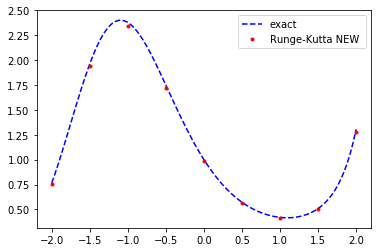

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
ax.plot(xexact,yexact,'--b',label='exact')
ax.plot(xrk,yrk[:,0],'.r',label='Runge-Kutta NEW ')
ax.legend()


### One step of Runge - Kutta for simple set of differential equations 

$$
\begin{align*} 
\frac{dy}{dt}&=z \\
\frac{dz}{dt}&=t-y
\end{align*} 
$$

lets assume: 

* y(0) = 2
* z(0) = 0


<img src="imgs/rk_set_de.png" width="400" />

## Lorenz attractor homemade

$$
\begin{align*} 
\frac{dx}{dt}&=\sigma (y-x) \\
\frac{dy}{dt}&=x(\rho-z) -y \\
\frac{dz}{dt}&=xy-\beta z 
\end{align*} 
$$

We can rewrite the above using two vectors and parameters: 
* $dydx, y, \sigma, \rho, \beta$

$$
\begin{align*} 
dydx[0]&=\sigma (y[1]-y[0]) \\
dydx[1]&=y[0](\rho-y[2]) \\
dydx[2]&=y[0]y[1]-\beta y[2] 
\end{align*} 
$$

* y[0]=1.0
* y[1]=1.0
* y[2]=1.0

In [38]:
####################################################
import numpy as np

def derivs(x, y):
    dydx = np.array([0.0,0.0,0.0])
    dydx[0] = sigma * (y[1] - y[0])
    dydx[1] = y[0] * (rho - y[2]) - y[1]
    dydx[2] = y[0] * y[1] - beta * y[2]
    return dydx


def rungeKutta(x0, y0, h):
    y = y0
    "Apply Runge Kutta Formulas to find next value of y"
    k1 = h * derivs(x0, y)
    k2 = h * derivs(x0 + 0.5 * h, y + 0.5 * k1)
    k3 = h * derivs(x0 + 0.5 * h, y + 0.5 * k2)
    k4 = h * derivs(x0 + h, y + k3)
    y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
    x0 = x0 + h
    return x0, y 

####################################################

sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

x0 = 0.0
y0 = np.array([1.0,1.0,1.0001])

xrk=[x0]
yrk=[y0]

h = 0.01
npoints=np.arange(x0,35.0,h)

for i in range(len(npoints)):
    xnew,ynew=rungeKutta(x0, y0, h)
#    print( 'The value of y at x is:', y0[0])
    xrk.append(xnew)
    yrk=np.append(yrk,[ynew],axis=0)
    x0=xnew
    y0=ynew
####################################################

## Lorenz attractor GitHub

In [39]:
#Academic work of Numerical Differential Equations
#Federal University of Minas Gerais

""" Utils """
import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
"""Compute the time-derivative of a Lorenz system."""
def xt(x, y, z, t):
    return (sigma*(y - x))

def yt(x, y, z, t):
    return (rho*x - y - x*z)

def zt(x, y, z, t):
    return (-1*(beta*z) + x*y)
# choose a different color for each trajectory
#colors = plt.cm.viridis(np.linspace(0, 1, 10))
def lorenz_ode_plot_components (x, y, z):
    plt.figure (figsize = (8.5,8.5))
    plt.plot ( t, x, linewidth = 1, color = 'b' ) 
    plt.plot ( t, y, linewidth = 1, color = 'r' )
    plt.plot ( t, z, linewidth = 1, color = 'g' )
    plt.grid ( True )
    plt.xlabel ( '<--- Time --->' )
    plt.ylabel ( '<--- x(t), y(t), z(t) --->' )
    plt.title ( 'Lorenz Time Series Plot' )
    
    plt.legend(['x','y','z'], loc = 2)
    plt.savefig ( 'lorenz_ode_components.png' )
    plt.show ( )
    return 

def lorenz_ode_plot_3d (x, y, z):
    fig = plt.figure ( figsize = (8.5,8.5))
    ax = fig.gca ( projection = '3d' )
    ax.plot ( x, y, z, linewidth = 0.5, color = 'r' )
    ax.grid ( True )
    ax.set_xlabel ( '<--- x(t) --->' )
    ax.set_ylabel ( '<--- y(t) --->' )
    ax.set_zlabel ( '<--- z(t) --->' )
    ax.set_title ( 'Lorenz 3D Plot' )
    
    plt.savefig ( 'lorenz_ode_3d.png' )
    plt.show ( )
    return

def RungeKutta4(xt,yt,zt,n = 3500, T = 35):
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    t = np.zeros(n+1)
    
    x[0] = 1.0
    y[0] = 1.0
    z[0] = 1.0
    t[0] = 0
    dt = T/float(n) #0.01
    
    #Compute the approximate solution at equally spaced times.
    for k in range (n):
    
        t[k+1] = t[k] + dt
        
        k1 = xt(x[k], y[k], z[k], t[k])
        l1 = yt(x[k], y[k], z[k], t[k])
        m1 = zt(x[k], y[k], z[k], t[k])

        k2 = xt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        l2 = yt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        m2 = zt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))

        k3 = xt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        l3 = yt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        m3 = zt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))

        k4 = xt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        l4 = yt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        m4 = zt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))

        x[k+1] = x[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y[k+1] = y[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z[k+1] = z[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

    return x, y, z, t


""" Initial values unchanged """
sigma = 10.0
beta = 8.0/3.0
rho = 28.0

xg, yg, zg, t = RungeKutta4(xt,yt,zt)

#lorenz_ode_plot_components (xg,yg,zg)
#lorenz_ode_plot_3d(xg,yg,zg)

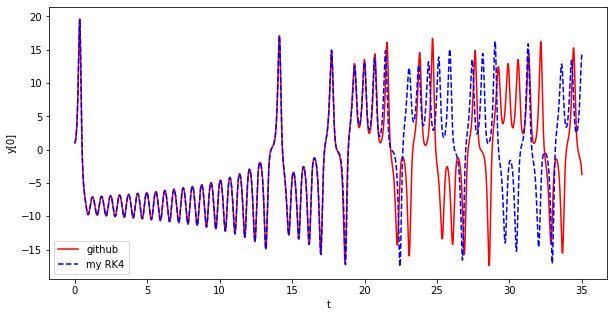

In [44]:
import matplotlib.pyplot as plt
import pylab
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(t,xg,'-r',label='github')
#ax.plot(xg,yg,'-r',label='github')

ax.plot(xrk,yrk[:,0],'--b',label='my RK4')
#ax.plot(yrk[:,0],yrk[:,1],':k',label='my RK4')

ax.set_xlabel('t')
ax.set_ylabel('y[0]')
ax.legend()

* the variables are not converging

### Plotting all three results

Text(0.5, 0.92, 'Lorenz 3D Plot')

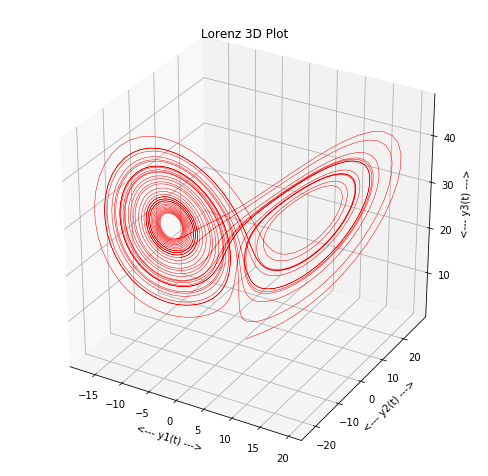

In [27]:
fig = plt.figure ( figsize = (8.5,8.5))
ax = fig.gca ( projection = '3d' )
ax.plot ( yrk[:,0], yrk[:,1], yrk[:,2], linewidth = 0.5, color = 'r' )
ax.set_xlabel ( '<--- y1(t) --->' )
ax.set_ylabel ( '<--- y2(t) --->' )
ax.set_zlabel ( '<--- y3(t) --->' )
ax.set_title ( 'Lorenz 3D Plot' )



* Studying a simple ODE, Lorenz discovered in 1963 an object that is called today a strange attractor: nearby points are attracted to a set of fractal dimension, and move around this set chaotically, with sensitive dependence on initial conditions. 

https://lazarusa.github.io/BeautifulMakie/animations/lorenzAttractorAnim/

## Homework
Solve the same equations using scipy.integrate.odeint and scipy.integrate.solve_ivp

$$
\begin{align*} 
\frac{dx}{dt}&=\sigma (y-x) \\
\frac{dy}{dt}&=x(\rho-z) -y \\
\frac{dz}{dt}&=xy-\beta z 
\end{align*} 
$$

for the parameters:

* $\sigma =10$
* $\rho=28$
* $\beta=8/3$

lets set intial conditions:

* x(0)=1.0
* y(0)=1.0
* z(0)=1.0

Compare the results. Seeing anything strange?